# Step 1: Data Loading and Storage

In [3]:
import pandas as pd
from sqlalchemy import create_engine



try:
    df = pd.read_csv('Loan_Default.csv')
    print("✅ CSV file loaded successfully into DataFrame.")
    print("DataFrame Info:")
    df.info()

except FileNotFoundError:
    print("❌ Error: 'Loan_Default.csv' not found. Please make sure the file is in the correct directory.")
    exit()



db_user = 'root'
db_password = 'pass'
db_host = 'localhost' 
db_port = '3306'      
db_name = 'loan_project_db' 


connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)


--
try:
    df.to_sql(
        name='loan_data',
        con=engine,
        if_exists='replace',
        index=False #
    )
    print("\n✅ Success! The data has been loaded into the 'loan_data' table in your MySQL database.")

except Exception as e:
    print(f"\n❌ An error occurred while writing to the database: {e}")

✅ CSV file loaded successfully into DataFrame.
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread   

# Step 2: Data Cleaning and Refinement


In [4]:
import numpy as np


df = pd.read_sql('loan_data', engine)
print("✅ Data loaded from MySQL table into DataFrame.")



df.drop_duplicates(subset='ID', keep='first', inplace=True)
print(f"Removed duplicates. New shape: {df.shape}")


numeric_cols_with_na = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'LTV', 'dtir1']
for col in numeric_cols_with_na:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("✅ Filled missing numeric values with the median.")


categorical_cols_with_na = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']
for col in categorical_cols_with_na:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("✅ Filled missing categorical values with the mode.")



df['Gender'] = df['Gender'].replace('Sex Not Available', 'Other')
print(f"Unique values in 'Gender' column after cleaning: {df['Gender'].unique()}")


df['Region'] = df['Region'].str.capitalize()
print("✅ 'Region' column has been standardized.")
print(f"New unique regions: {df['Region'].unique()}")


df.to_sql(
    name='loan_data_cleaned',  
    con=engine,
    if_exists='replace',
    index=False
)
print("\n✅ Success! The cleaned data has been saved to the 'loan_data_cleaned' table in MySQL.")

✅ Data loaded from MySQL table into DataFrame.
Removed duplicates. New shape: (148670, 34)
✅ Filled missing numeric values with the median.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20768\3597515569.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20768\3597515569.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

✅ Filled missing categorical values with the mode.
Unique values in 'Gender' column after cleaning: ['Other' 'Male' 'Joint' 'Female']
✅ 'Region' column has been standardized.
New unique regions: ['South' 'North' 'Central' 'North-east']

✅ Success! The cleaned data has been saved to the 'loan_data_cleaned' table in MySQL.


In [5]:
output_filename = 'Loan_Default_Cleaned.csv'
try:

    df.to_csv(output_filename, index=False)
    print(f"\n✅ Success! The cleaned data has been downloaded to '{output_filename}'")
    print(f"You can find the file in the same directory as your Python script.")

except Exception as e:
    print(f"\n❌ Error: Could not save the file. Details: {e}")



✅ Success! The cleaned data has been downloaded to 'Loan_Default_Cleaned.csv'
You can find the file in the same directory as your Python script.


✅ Missing 'term' values filled with mode (360.0).
✅ Standardized 'business_or_commercial'. Unique values: ['nob/c' 'b/c']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20768\1286532866.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['term'].fillna(term_mode, inplace=True)


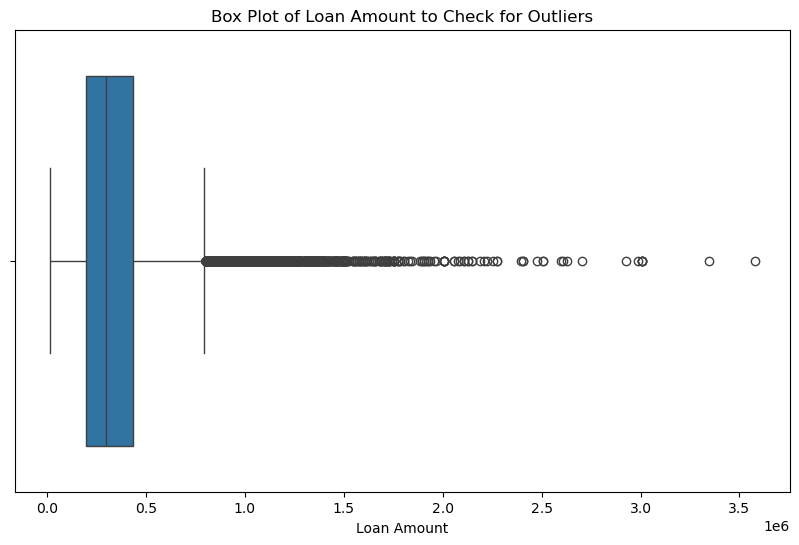

✅ Renamed columns for clarity.

✅ Success! The final cleaned data has been saved to the 'loan_data_final_cleaned' table.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Since only 41 rows are missing, imputing with the mode (the most common term) is safe and effective.
term_mode = df['term'].mode()[0]
df['term'].fillna(term_mode, inplace=True)
print(f"✅ Missing 'term' values filled with mode ({term_mode}).")

# 2. Categorical Consistency for 'business_or_commercial'
df['business_or_commercial'] = df['business_or_commercial'].str.strip() 
print(f"✅ Standardized 'business_or_commercial'. Unique values: {df['business_or_commercial'].unique()}")

# 3. Outlier Check for 'loan_amount' (Visualization)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amount'])
plt.title('Box Plot of Loan Amount to Check for Outliers')
plt.xlabel('Loan Amount')
plt.show()


column_rename_map = {
    'approv_in_adv': 'approved_in_advance',
    'co-applicant_credit_type': 'co_applicant_credit_type',
    'dtir1': 'debt_to_income_ratio'
}
df.rename(columns=column_rename_map, inplace=True)
print("✅ Renamed columns for clarity.")



df.to_sql(
    name='loan_data_final_cleaned',
    con=engine,
    if_exists='replace',
    index=False
)
print("\n✅ Success! The final cleaned data has been saved to the 'loan_data_final_cleaned' table.")


# Step 3: Exploratory Data Analysis (EDA)

✅ Final cleaned data loaded for EDA.


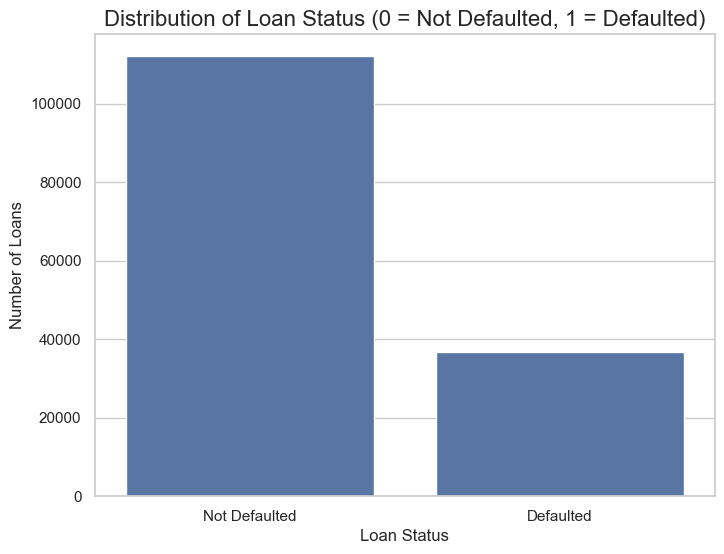

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20768\1657267327.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Status', data=df_clean, ci=None)


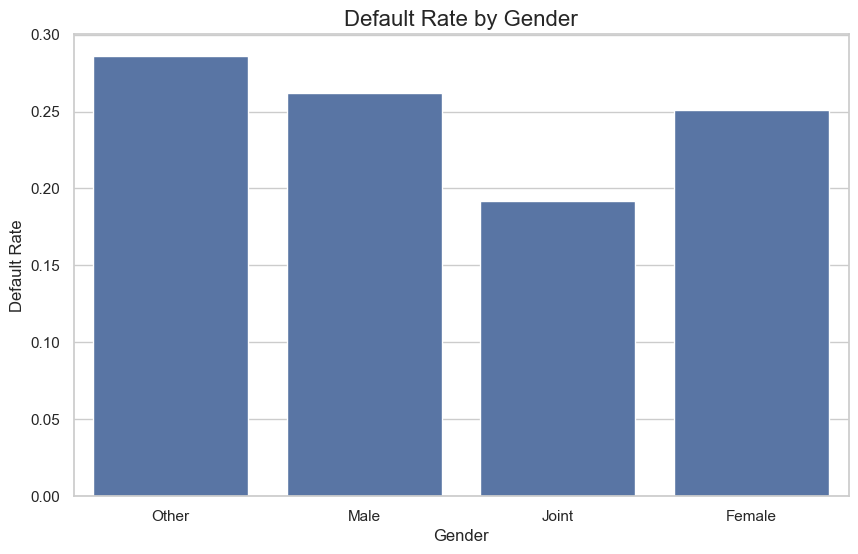

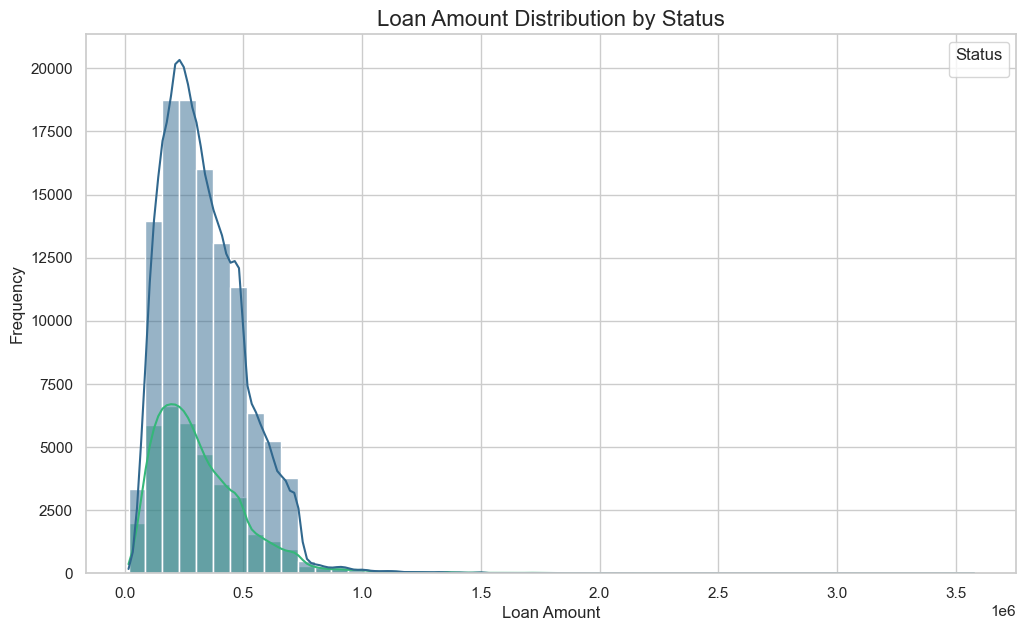

In [35]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt


db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)


df_clean = pd.read_sql('loan_data_final_cleaned', engine)
print("✅ Final cleaned data loaded for EDA.")

sns.set_theme(style="whitegrid")

# Plot 1: Loan Status Distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df_clean)
plt.title('Distribution of Loan Status (0 = Not Defaulted, 1 = Defaulted)', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])
plt.show()

# Plot 2: Default Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Status', data=df_clean, ci=None)
plt.title('Default Rate by Gender', fontsize=16)
plt.ylabel('Default Rate')
plt.xlabel('Gender')
plt.show()

# Plot 3: Loan Amount Distribution by Loan Status
plt.figure(figsize=(12, 7))
sns.histplot(data=df_clean, x='loan_amount', hue='Status', kde=True, bins=50, palette='viridis')
plt.title('Loan Amount Distribution by Status', fontsize=16)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Not Defaulted', 'Defaulted'], title='Status')
plt.show()

# Step 4: Feature Engineering

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 1. Handle Ordinal & Complex Columns (using your robust function)
def convert_age_range(age_range):
    try:
        age_range = str(age_range) # Ensure it's a string
        if pd.isna(age_range):
            return None
        if "+" in age_range:
            return int(age_range.replace("+", ""))
        elif "<" in age_range:
            return int(age_range.replace("<", "")) - 5
        elif ">" in age_range: # Added handling for >74
             return int(age_range.replace(">", ""))
        elif "-" in age_range:
            parts = age_range.split('-')
            return (int(parts[0]) + int(parts[1])) // 2
        else:
            return int(age_range)
    except:
        return None

# The column is 'age_numeric', not 'Age'
if "age_numeric" in df.columns:
    df["age_numeric"] = df["age_numeric"].apply(convert_age_range)
    print("✅ Transformed 'age_numeric' column.")

# 2. Encode Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.columns = [str(col) for col in df_encoded.columns] # Force column names to string

# 3. Scale Numeric Features Only
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove the target variable from the list of columns to be scaled
if 'Status' in numeric_cols:
    numeric_cols.remove('Status')

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("✅ Feature Engineering Completed!")


df_encoded.to_sql(
    name='loan_data_engineered',
    con=engine,
    if_exists='replace',
    index=False
)
print("\n✅ Success! The final engineered data has been saved to the 'loan_data_engineered' table in your database.")

✅ Feature Engineering Completed!

✅ Success! The final engineered data has been saved to the 'loan_data_engineered' table in your database.


In [14]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler


# 1. Drop the 'year' column if it exists and has no predictive power
if 'year' in df.columns:
    if df['year'].nunique() == 1:
        df.drop(columns=['year'], inplace=True)
        print("✅ 'year' column dropped.")

# 2. Separate ID, Target, and Features for processing
ids = df['ID']
target = df['Status']
features_to_process = df.drop(columns=['ID', 'Status'])

# 🔑 Ensure all column names are strings
features_encoded.columns = features_encoded.columns.map(str)

# 🔑 Re-identify numeric columns in the encoded dataframe (ensures all are strings now)
numeric_cols = features_to_process.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.map(str)  # force to string

# 3. Scale ONLY the original numeric features
scaler = StandardScaler()
features_encoded[numeric_cols] = scaler.fit_transform(features_encoded[numeric_cols])
print("✅ Features correctly encoded and scaled.")



# 1. Combine the original ID with the processed features
final_df = pd.concat([ids, features_encoded], axis=1)

final_df['Status'] = target
print("✅ Final dataset constructed with clear column order.")
print("Final Columns Sample:", final_df.columns.tolist()[:10])

final_df.to_sql(
    name='loan_data_engineered',
    con=engine,
    if_exists='replace',
    index=False
)
print("\n✅ Success! The perfected data has been saved to the 'loan_data_engineered' table.")

✅ Features correctly encoded and scaled.
✅ Final dataset constructed with clear column order.
Final Columns Sample: ['ID', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV']

✅ Success! The perfected data has been saved to the 'loan_data_engineered' table.


In [15]:
print(final_df[numeric_cols].mean().round(2))
print(final_df[numeric_cols].std().round(2))


loan_amount            -0.0
rate_of_interest       -0.0
Interest_rate_spread    0.0
Upfront_charges        -0.0
term                   -0.0
property_value          0.0
income                 -0.0
Credit_Score            0.0
LTV                     0.0
debt_to_income_ratio    0.0
dtype: float64
loan_amount             1.0
rate_of_interest        1.0
Interest_rate_spread    1.0
Upfront_charges         1.0
term                    1.0
property_value          1.0
income                  1.0
Credit_Score            1.0
LTV                     1.0
debt_to_income_ratio    1.0
dtype: float64


# Step 5: Predictive Modeling

✅ Fully engineered data loaded from MySQL.
Shape of features (X): (148670, 48)
Shape of target (y): (148670,)

✅ Data successfully split into training and testing sets.
✅ Logistic Regression model trained successfully.
✅ Predictions made on the test set.

--- Model Evaluation Report ---
Accuracy: 0.8743
Precision: 0.9311
Recall: 0.5289
F1-Score: 0.6746
-----------------------------


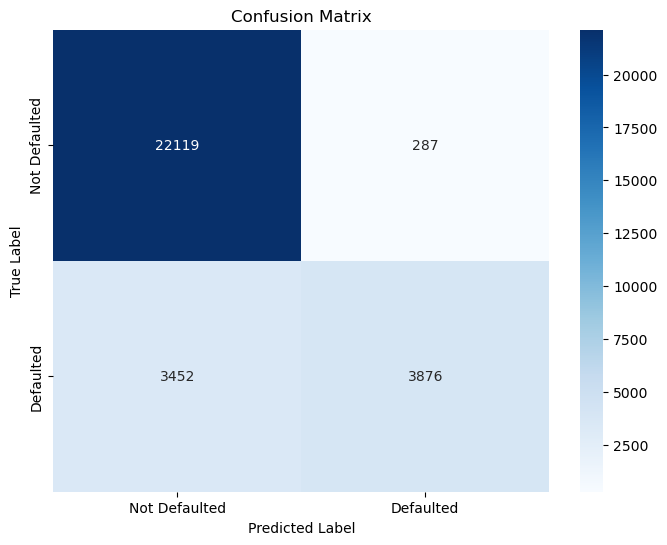

In [21]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

df = pd.read_sql('loan_data_engineered', engine)
print("✅ Fully engineered data loaded from MySQL.")


y = df['Status']
X = df.drop(columns=['Status', 'ID'])


X.columns = X.columns.astype(str)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n✅ Data successfully split into training and testing sets.")

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("✅ Logistic Regression model trained successfully.")

y_pred = model.predict(X_test)
print("✅ Predictions made on the test set.")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Evaluation Report ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------------------")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

df = pd.read_sql('loan_data_engineered', engine)
print("✅ Fully engineered data loaded from MySQL.")


# Drop the ID column immediately to prevent any chance of data leakage
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)
    print("✅ ID column dropped to prevent data leakage.")

y = df['Status']
X = df.drop(columns=['Status'])
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n✅ Data successfully split.")

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("⏳ Training the Random Forest model...")
model.fit(X_train, y_train)
print("✅ Random Forest model trained successfully.")

y_pred = model.predict(X_test)
print("✅ Predictions made on the test set.")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Random Forest - Model Evaluation Report ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("---------------------------------------------")

✅ Fully engineered data loaded from MySQL.
✅ ID column dropped to prevent data leakage.

✅ Data successfully split.
⏳ Training the Random Forest model...
✅ Random Forest model trained successfully.
✅ Predictions made on the test set.

--- Random Forest - Model Evaluation Report ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
---------------------------------------------


In [24]:
import pandas as pd
from sqlalchemy import create_engine

db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)


df = pd.read_sql('loan_data_final_cleaned', engine)
print("✅ Loaded 'loan_data_final_cleaned' to investigate leakage.")

# --- Investigate the relationship between 'Credit_Worthiness' and 'Status' ---
leak_investigation = df.groupby('Credit_Worthiness')['Status'].value_counts(normalize=True)

print("\n--- Default Rate by Credit Worthiness Category ---")
print(leak_investigation)
print("--------------------------------------------------")

✅ Loaded 'loan_data_final_cleaned' to investigate leakage.

--- Default Rate by Credit Worthiness Category ---
Credit_Worthiness  Status
l1                 0         0.756723
                   1         0.243277
l2                 0         0.682264
                   1         0.317736
Name: proportion, dtype: float64
--------------------------------------------------


In [25]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

df = pd.read_sql('loan_data_engineered', engine)
print("✅ Fully engineered data loaded from MySQL.")

y = df['Status']
X = df.drop(columns=['Status', 'ID'])
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("⏳ Training the Random Forest model to find feature importances...")
model.fit(X_train, y_train)
print("✅ Model trained.")

importances = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))
print("--------------------------------------")

✅ Fully engineered data loaded from MySQL.
⏳ Training the Random Forest model to find feature importances...
✅ Model trained.

--- Top 10 Most Important Features ---
                              Feature  Importance
2                Interest_rate_spread    0.301922
3                     Upfront_charges    0.238722
1                    rate_of_interest    0.163649
34                   credit_type_EQUI    0.129301
5                      property_value    0.033417
8                                 LTV    0.032727
9                debt_to_income_ratio    0.022441
6                              income    0.011232
25          lump_sum_payment_not_lpsm    0.009543
43  submission_of_application_to_inst    0.007077
--------------------------------------


✅ Fully engineered data loaded from MySQL.
✅ Dropped leaking features. Final feature count: 42

✅ Data successfully split.
⏳ Training the final Random Forest model...
✅ Model trained successfully.

--- Final REALISTIC Random Forest - Evaluation Report ---
Accuracy: 0.8903
Precision: 0.9287
Recall: 0.6010
F1-Score: 0.7297
---------------------------------------------------------


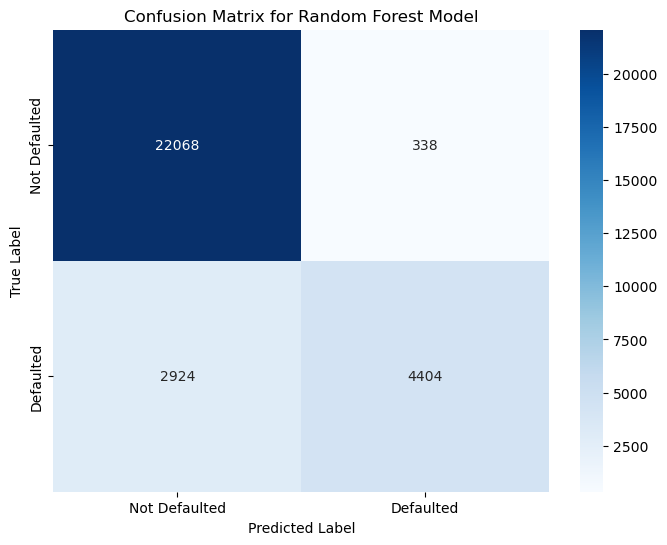

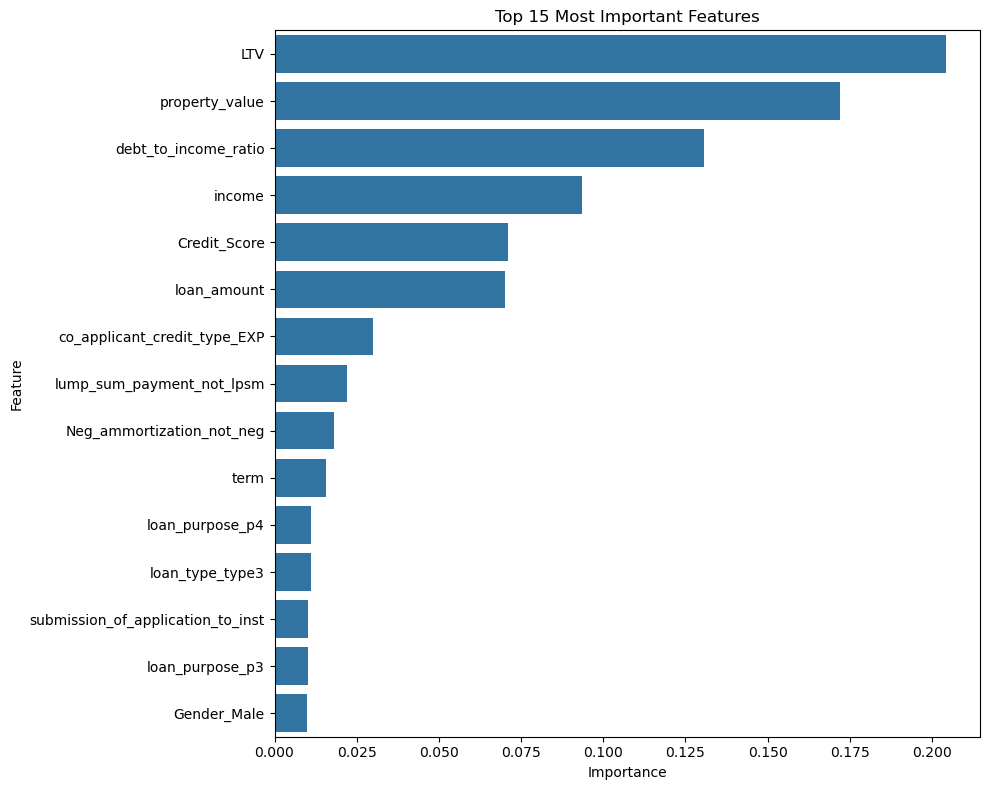

In [32]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

db_user = 'root'
db_password = 'pass'
db_host = 'localhost'
db_port = '3306'
db_name = 'loan_project_db'

connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

df = pd.read_sql('loan_data_engineered', engine)
print("✅ Fully engineered data loaded from MySQL.")

y = df['Status']
leaking_features = [
    'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
    'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP'
]
X = df.drop(columns=['Status', 'ID'] + leaking_features)
X.columns = X.columns.astype(str)
print(f"✅ Dropped leaking features. Final feature count: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n✅ Data successfully split.")

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("⏳ Training the final Random Forest model...")
model.fit(X_train, y_train)
print("✅ Model trained successfully.")

y_pred = model.predict(X_test)

print("\n--- Final REALISTIC Random Forest - Evaluation Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("---------------------------------------------------------")


# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Defaulted', 'Defaulted'],
            yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 2. Feature Importance Plot
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15)) # Top 15 features
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Step 6: Model Comparison and Conclusion

### Project Summary
In this project, we developed a machine learning model to predict the probability of loan default. We started with raw data, performed extensive cleaning and exploratory data analysis, engineered features, and then trained and compared predictive models.

---

### Model Performance Comparison
We evaluated two different models. The primary goal was to improve the **Recall** score (the ability to correctly identify actual defaults) without significantly sacrificing **Precision** (the reliability of default predictions).

| Metric | Logistic Regression (Baseline) | Random Forest (Final Model) |
| :--- | :--- | :--- |
| **Accuracy** | 87.43% | **89.03%** |
| **Precision**| **93.11%** | 92.87% |
| **Recall** | 52.89% | **60.10%** |
| **F1-Score** | 0.6747 | **0.7297** |

---

### Conclusion
The **Random Forest model was the best-performing model.**

It achieved a significant improvement in **Recall** (from 53% to 60%) compared to the baseline Logistic Regression model, while maintaining a high **Precision** of nearly 93%. This means the model successfully identifies more at-risk loans, which directly helps in minimizing financial losses for the lender.

The final model provides a reliable and automated tool for credit risk analysis, demonstrating the practical value of machine learning in the financial industry.